In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
%matplotlib inline

In [48]:
data =pd.read_csv("/Users/pongsathornphakdeethai/Desktop/Lion's Projects/Customer Personal Analysis and Clustering/marketing_campaign.csv", sep='\t')

In [49]:
#missing value
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [50]:
df = data.copy()

In [51]:
# highlight the code because I use pipeline instead this already
# df["Income"] = df["Income"].fillna(df["Income"].mean())

In [52]:
df=df.drop('ID',axis=1)

In [53]:
# create customer age column
import datetime as dt
df['age']=dt.datetime.now().year-df['Year_Birth']
df=df.drop(['Year_Birth'],axis=1)

In [54]:
df["children"] = df["Kidhome"]+df["Teenhome"]

In [55]:
# select columns for different preprocessing
categorical_features = ['Education', 'Marital_Status']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [56]:
# remove non-relevant numerical features for clustering
non_relevant_features = ['ID', 'Z_CostContact', 'Z_Revenue', 'Complain']
numerical_features = [feature for feature in numerical_features if feature not in non_relevant_features]

##### Create preprocessing pipelines

In [57]:
numerical_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                     ("scaler", StandardScaler())
                                     ]) 

categorical_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                       ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                       ])

##### Combine preprocessing pipeline

In [58]:
preprocessor = ColumnTransformer(
                transformers=[
                    ("num", numerical_pipeline, numerical_features),
                    ("cate", categorical_pipeline, categorical_features)
                ]
)

In [59]:
# Preprocessing the data
X_preprocessed = preprocessor.fit_transform(df)
df.isnull().sum(), numerical_features

(Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 age                     0
 children                0
 dtype: int64,
 ['Income',
  'Kidhome',
  'Teenhome',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchas

## Clustering TIME!!!

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

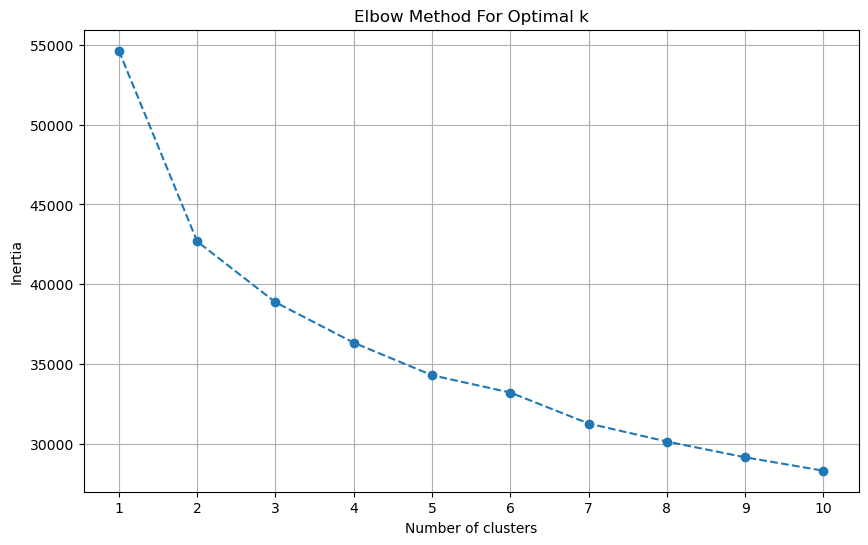

In [60]:
from sklearn.cluster import KMeans

# Determining the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Proceeding with K-means clustering using 4 clusters

In [61]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(X_preprocessed)

# Assign the clusters to the original data
df["Cluster"] = kmeans_final.labels_

# Analyz the characteristics of each cluster
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
cluster_summary.T

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster,0,1,2,3
Income,81814.928571,34675.111874,58027.475214,73772.497748
Kidhome,0.041420,0.806984,0.231419,0.042411
Teenhome,0.118343,0.442289,0.964527,0.194196
Recency,49.508876,49.317168,48.145270,49.754464
MntWines,875.538462,41.111542,462.903716,483.091518
MntFruits,56.289941,4.895247,21.167230,71.040179
MntMeatProducts,470.337278,23.057226,134.582770,426.419643
MntFishProducts,77.627219,7.083414,27.817568,105.283482
MntSweetProducts,66.177515,4.923375,21.645270,70.417411
MntGoldProds,77.976331,15.114452,59.841216,76.834821


In [62]:
# # Assign the clusters to the original data (assuming you already have KMeans fitted)
# df["Cluster"] = kmeans_final.labels_

# # Select only numeric columns (assuming you know the column names)
# numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# # Group by cluster and get min/max for numeric columns only
# cluster_summary = df[numeric_cols].groupby("Cluster").agg(['min', 'max'])

# # Transpose the summary table for better readability
# cluster_summary = cluster_summary.T

# # Display the table
# print(cluster_summary)

#### Summarize of 4 clusters

Cluster 0: 

- highest income
- low number of children
- spends significantly on wines, meats
- high acceptance rate for each campaign
- low purchase with discount
- low complain rate
- highest acceptance rate for 5th campaign


Cluster 1: 

- lowest income
- high kid
- spend highest time in visiting website per month
- low puchase and campieng accepting rate
- low response rate
- high complain


Cluster 2:

- moderate incomeand
- spends generously across various product categories, especially on wines, fruits, and meats
- mostly purchase with discount on website and store
- low acceptance rates for the campaigns
- lowest recency


Cluster 3: 
- pretty high income
- balanced spending pattern across the board
- very high fruits, meat, fish and sweets purchasing rate
- mostly purchase on store, but low website visiting rate
- low campaign accepting, but campaign 1.
- low complain